In [1]:
import datetime
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import export_graphviz
from sklearn.decomposition import PCA

%matplotlib inline
sns.set()

In [2]:
%cd ..

C:\Users\SiddharthaMisra\Documents\Springboard\AAQL_Analysis


In [3]:
cd data\processed

C:\Users\SiddharthaMisra\Documents\Springboard\AAQL_Analysis\data\processed


In [4]:
df = pd.read_csv('3.0 Processed Data with Dummy Variables.csv', index_col = 'Unnamed: 0')
pd.set_option('display.max_columns',275)
df.head()

,Survey_ID,Age,Education_Completed,Household_Size,No_One,Spouse,Children,Grand_Children,Parent,Grandparent,Brother/Sister,Other_Relative,Friends,Other,Full_Time_Employment,Part_Time_Employment,Self_Employed_Full_Time,Self_Employed_Part_Time,Student,Homemaker,Disabled,Unemployed,Retired,Other_Employement,Income,Achieving_Ends_Meet,US_Born,Duration_of_Residency,Primary_Language,English_Speaking,English_Difficulties,Familiarity_with_America,Familiarity_with_Ethnic_Origin,Identify_Ethnically,Belonging,Discrimination,Present_Health,Present_Mental_Health,Present_Oral_Health,Hygiene_Assistance,Smoking,Drinking,Regular_Exercise,Healthy_Diet,Hypertension,Diabetes,Arthritis,Physical_Check-up,Dentist_Check-up,Urgentcare,Folkmedicine,Primary_Care,Health_Insurance,Dental_Insurance,Unmet_Health_Need,Unmet_Dental_Needs,Transportation_(Medical),Interpretation_(Medical),Communication_Problem,Counseling_Ethnic_Preference,Users,Satisfaction,Family,Close_Friend,Acquaintances,Heal_Professionals,Mobile_Apps,Email,Social_Networks,Online_Communities,Health_Website,Other.1,Quality_of_Life,Satisfied_With_Life_1,Satisfied_With_Life_2,Psychiatrist,General_Practitioner,Therapist/Counselor,Religious_Leader,Weakness,Shame,Disappointment,Disclosure,Antidepressants,Danger,Recovery,Treatment,Counseling,Medical_Ethnic_Preference,Knowledge,Diagnosed,Concern_for_Self_(AD),Concern_for_Others_(AD),Prevention,Plan_(AD),Education_(AD),Services_(AD),Language_Barrier_(AD),Fate_(AD),Aging_(AD),Embarrassing_(AD),Avoidance_(AD),Cure_(AD),Nursing_Home_(AD),Advanced_Directives,Have_an_Advanced_Directive,Superstition,See_Family,Close_Family,Helpful_Family,See_Friends,Close_Friends,Helpful_Friends,Family_Respect,Similar_Values,Successful_Family,Trust,Loyalty,Family_Pride,Expression,Spend_Time_Together,Feel_Close,Togetherness,Religious_Importance,Close-knit_Community,Helpful_Community,Community_Shares_Values,Get_Along,Community_Trust,Residency,Place_to_Live,Raising_Children,Place_to_Work,Small_Businesses,Place_to_Retire,Arts_and_Culture,Safety,Traffic,Austin_Quality_of_Life,Quality_of_Service,Parks_and_Recs,Libraries,Public_Safety,Airport,Austin_Energy,Court,Social_Services,Aware_of_AARC,Visit_Frequency,Activities,EMS_Classes,Fire_Alarm,Public_Computer,Library_Internet_Acess,Literature,Citizenship_Class,Small_Business,English_Classes,9-1-1,3-1-1,APD_Languages,District,Satisfaction_With_Housing.,Nursing_Home,Smoke_Detector,Recycle,Compost,Public_Transportation,Bicycling,Carpooling,Personal_Car,Car_Share,Walking,Other_Transportation,Access_to_a_Computer,Mobile_Devices,Home_Phone,Public_Meeting,Council_Meeting,Contact_City_Official,City_Election,Focus_Group,City_Effort_Satisfaction,Paper_(City-based),TV/Radio_(City-based),Website_(City-based),Social_Networks_(City-based),People_(City-based),Other_(City-based),Paper_(Non-city-based_Ethnic),TV/Radio_(Non-city-based_Ethnic),Website_(Non-city-based_Ethnic),Social_Networks_(Non-city-based_Ethnic),People_(Non-city-based_Ethnic),Other_(Non-city-based_Ethnic),Paper_(Non-city-based_General),TV/Radio_(Non-city-based_General),Website_(Non-city-based_General),Social_Networks_(Non-city-based_General),People_(Non-city-based_General),Other_(Non-city-based_General),Satisfaction_Score,Gender_Female,Gender_Male,Ethnicity_Asian Indian,Ethnicity_Chinese,Ethnicity_Filipino,Ethnicity_Korean,Ethnicity_Other,Ethnicity_Vietnamese,Marital_Status_Living with a partner,Marital_Status_Married,Marital_Status_Other,Marital_Status_Single,Religion_Buddhist,Religion_Catholic,Religion_Hindu,Religion_Muslim,Religion_None,Religion_Other,Religion_Protestant,Occupation_0,Occupation_Business owner,"Occupation_Clerical, office, sales","Occupation_Manager, executive, or official",Occupation_Other,Occupation_Professional,Occupation_Semi-skilled,Occupation_Service worker,Occupation_Skilled trades,Language_Chinese Simplified,Language_Chinese Traditional,Language_Eng_Chinese only,Language_English,Language_Gujarati,Language_Hindi,Language_Korean,Language_Tagalog,Language_Viet

In [5]:
y = df['Quality_of_Life']
x = df.drop(['Survey_ID','Satisfaction_Score', 'Quality_of_Life'],axis=1)

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.2,random_state=42)

In [7]:
#Instantiate pipeline and its respective elements
begin_time = datetime.datetime.now()
gb = GradientBoostingClassifier(random_state=42, verbose=1)
param_grid = {
    'learning_rate': [0.1, 0.25, 0.5, 0.75],
    'n_estimators': np.arange(10,70,20),
    'max_depth': np.arange(5,115,20),
    'min_samples_split': np.arange(2,127,25)
}

In [8]:
#from IPython.display import Audio
#sound_file = 'http://www.soundjay.com/button/beep-07.wav'
from sklearn.model_selection import RandomizedSearchCV
cv = RandomizedSearchCV(gb, param_grid, n_iter=75)
cv
#Audio(sound_file, autoplay=True)

RandomizedSearchCV(estimator=GradientBoostingClassifier(random_state=42,
                                                        verbose=1),
                   n_iter=75,
                   param_distributions={'learning_rate': [0.1, 0.25, 0.5, 0.75],
                                        'max_depth': array([  5,  25,  45,  65,  85, 105]),
                                        'min_samples_split': array([  2,  27,  52,  77, 102]),
                                        'n_estimators': array([10, 30, 50])})

In [9]:
cv.fit(x_train, y_train)
#Audio(sound_file, autoplay=True)

C:\Users\SiddharthaMisra\Anaconda3\envs\capstone2\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


      Iter       Train Loss   Remaining Time 
         1        2436.4707            4.62s
         2      770117.9145            5.43s
         3      769756.3277            5.05s
         4      769476.2274            4.41s
         5      769246.1924            3.62s
         6 2764075227059655253426176.0000            2.87s
         7 19382509869195673344988555816199704302324386303817285632.0000            2.24s
         8 19382509869195673344988555816199704302324386303817285632.0000            1.52s
         9 19382509869195673344988555816199704302324386303817285632.0000            0.76s
        10 19382509869195673344988555816199704302324386303817285632.0000            0.00s
      Iter       Train Loss   Remaining Time 
         1        2448.5436            4.02s
         2        4514.6128            5.61s
         3 28294836582049666246590512340082600430338514292903797336559557475773948471510571234094331581846601369651318645332485845600511595577437583310848.0000            4.8

         7 15461015612087900459002135112395232845119177787084346004123946787707736742334300160.0000            7.63s
         8 15461015612087900459002135112395232845119177787084346004123946787707736742334300160.0000            7.07s
         9 15461015612087900459002135112395232845119177787084346004123946787707736742334300160.0000            6.66s
        10 15461015612087900459002135112395232845119177787084346004123946787707736742334300160.0000            6.21s
        20 39975155555340968377939987957989418262959392772657102951098196382786714584425598294598187220992.0000            2.81s
        30 184563914264903984371379979948209873608413178982096856127077795762676950728551157457230206744107023851013242877180526876969402368.0000            0.00s
      Iter       Train Loss   Remaining Time 
         1        3573.1679            8.12s
         2       81739.0994            7.50s
         3 144976674757757.9688            7.10s
         4 10926938330038326125510822699804133943232430

         4 3556391254858457718800627355951601822346266534223278155393681521940898708417624606773681394532479881293539814780209450713088.0000            1.56s
         5 3556391254858457718800627355951601822346266534223278155393681521940898708417624606773681394532479881293539814780209450713088.0000            1.29s
         6 94175435450869260054653925844515355314109810204705985530329358731762918335271799023508928382922765474462164770644663856005120.0000            1.02s
         7 94175435450869260054653925844515355314109810204705985530329358731762918335271799023508928382922765474462164770644663856005120.0000            0.77s
         8 94175435450869260054653925844515355314109810204705985530329358731762918335271799023508928382922765474462164770644663856005120.0000            0.51s
         9 94175435450869260054653925844515355314109810204705985530329358731762918335271799023508928382922765474462164770644663856005120.0000            0.26s
        10 9417543545086926005465392584451535531

         7 127122256063514786462121022837701854711775232.0000            5.74s
         8 127122256063514786462121022837701854711775232.0000            5.52s
         9 1306397244614889936165205409219034176883674665003977553384132575232.0000            5.32s
        10 72089539375652469736959402871895047952892469846102385735691220811776.0000            5.05s
        20 4326150289124942465569272417188757271386184391109981767463249824532603201680154075319608460478481994529630479415702064201728.0000            2.45s
        30 4326150289124942465569272417188757271386184391109981767463249824532603201680154075319608460478481994529630479415702064201728.0000            0.00s
      Iter       Train Loss   Remaining Time 
         1        3417.4041            7.13s
         2      214504.8452            7.44s
         3   865966533.3168            7.02s
         4 13012698182322710782575104252160637096856704330683474217397508128203091918733979691253760.0000            6.91s
         5 13012698

         6 1068906703877029374064879532737044087393745178740890815056512482103034229493215116924493794455184201416432712919791173632.0000            2.92s
         7 54739568155253723217533691434406683299563846935278381931388491607182961845161526613262977841953292330316410515844311126170244892378353949999104.0000            2.25s
         8 1088754850890719522737556801587679677125837100260178705661061233525842381949041283684058716063136992616546196124070850627398676542019206555631616.0000            1.52s
         9 1088754850890719522737556801587679677125837100260178705661061233525842381949041283684058716063136992616546196124070850627398676542019206555631616.0000            0.77s
        10 1088754850890719522737556801587679677125837100260178705661061233525842381949041283684058716063136992616546196124070850627398676542019206555631616.0000            0.00s
      Iter       Train Loss   Remaining Time 
         1        3328.6258            3.36s
         2 21324526593126.4141          

        20 6573434313250736788028671601406933781592688034286058234762809087455846154942713745438940929722513149838768053194883537442179072929301562988089724370944.0000           27.68s
        30 6573434313250736788028671601406933781592688034286058234762809087455846154942713745438940929722513149838768053194883537442179072929301562988089724370944.0000           17.28s
        40 6573434313250736788028671601406933781592688034286058234762809087455846154942713745438940929722513149838768053194883537442179072929301562988089724370944.0000            8.23s
        50 6573434313250736788028671601406933781592688034286058234762809087455846154942713745438940929722513149838768053194883537442179072929301562988089724370944.0000            0.00s
      Iter       Train Loss   Remaining Time 
         1        2933.9642           21.94s
         2       10604.3111           30.22s
         3 89743388356345412778183519126659590033773745724877199154132169465254187865666309678021321364878978681081464757979

         1        2509.6341           12.43s
         2        2137.7349           17.76s
         3       11671.7716           18.87s
         4       11440.0139           18.93s
         5       11247.9670           18.82s
         6       11077.5135           18.33s
         7       10933.3146           17.64s
         8       10809.0439           16.94s
         9       10698.2241           16.21s
        10       10599.3582           15.48s
        20       10077.9447            7.80s
        30        9918.7055            0.00s
      Iter       Train Loss   Remaining Time 
         1         959.9231           15.51s
         2         561.8479           25.68s
         3         342.5273           28.43s
         4         212.5606           30.15s
         5         133.1323           29.80s
         6          83.8213           29.04s
         7          52.9383           28.15s
         8          33.4968           27.13s
         9          21.2198           26.11s
        1

         4 766659393167535744.0000           14.32s
         5 1350980501732988688968445193979359657984.0000           14.34s
         6 1350980501732988688968445193979359657984.0000           14.24s
         7 107176108626475997101388273249255383786907806075502106535584768064952285272250317132306782319869756386492187868379225852976976069050480937737543221248.0000           14.05s
         8 107176108626475997101388273249255383786907806075502106535584768064952285272250317132306782319869756386492187868379225852976976069050480937737543221248.0000           13.89s
         9 107176108626475997101388273249255383786907806075502106535584768064952285272250317132306782319869756386492187868379225852976976069050480937737543221248.0000           13.62s
        10 107176108626475997101388273249255383786907806075502106535584768064952285272250317132306782319869756386492187868379225852976976069050480937737543221248.0000           13.27s
        20 10717610866082839401809046781556543758816659238152466

         2        1593.8235            7.63s
         3        1198.5672            7.29s
         4         954.6477            7.07s
         5         792.3201            6.78s
         6         663.0273            6.52s
         7         558.3993            6.24s
         8         479.1424            5.98s
         9         410.0245            5.72s
        10         345.1950            5.47s
        20          81.4387            2.72s
        30          21.8989            0.00s
      Iter       Train Loss   Remaining Time 
         1        2157.7505            6.96s
         2        1518.0107            7.26s
         3        1193.2815            7.11s
         4         944.9913            7.07s
         5         764.0197            6.84s
         6         645.3399            6.57s
         7         538.8778            6.30s
         8         439.0374            6.02s
         9         375.9687            5.76s
        10         317.5302            5.50s
        2

         9 955543531937459846250001739302832514392914117133217674417741787619936049615250468304527484429335818581940515870305831122255235235679461757385479028736.0000           15.65s
        10 955543531937459846250001739302832514392914117133217674417741787619936049615250468304527484429335818581940515870305831122255235235679461757385479028736.0000           14.94s
        20 376156801761517486379475941493642517976129731103600923503487996855454035627149207574816581246649630751920859343321622052023689897936346773312609017921536.0000            6.76s
        30 376156801761517486379475941493642517976129731103600923503487996855454035627149207574816581246649630751920859343321622052023689897936346773312609017921536.0000            0.00s
      Iter       Train Loss   Remaining Time 
         1        2906.1193           11.54s
         2      280834.9073           14.36s
         3  2587302835.8719           14.98s
         4 947091097581855637908674686326165607749703092452276958565097666217

        10   390700106.4695           12.92s
        20 3980421364339339650139883932540554947701525622730305783353545133606080785072010105016304343311692779886150627296049343703189291008.0000            7.08s
        30 3980421364339339650139883932540554947701525622730305783353545133606080785072010105016304343311692779886150627296049343703189291008.0000            0.00s
      Iter       Train Loss   Remaining Time 
         1        2608.3879           11.19s
         2       12801.2748           13.92s
         3       16908.2066           15.12s
         4 79764524234373665077082323906810757206769869290520327974027264.0000           15.14s
         5 79764524234373665077082323906810757206769869290520327974027264.0000           14.94s
         6 79764524234373665077082323906810757206769869290520327974027264.0000           14.74s
         7 79764524234373665077082323906810757206769869290520327974027264.0000           14.40s
         8 243633804894632260628136260046615443325494729938245

        30           0.0000           24.63s
        40           0.0000           12.92s
        50           0.0000            0.00s
      Iter       Train Loss   Remaining Time 
         1          80.8101           28.16s
         2          19.9037           43.39s
         3           5.0452           47.18s
         4           1.2873           48.54s
         5           0.3290           49.73s
         6           0.0841           50.26s
         7           0.0215           49.82s
         8           0.0055           49.97s
         9           0.0014           49.30s
        10           0.0004           48.13s
        20           0.0000           36.24s
        30           0.0000           24.66s
        40           0.0000           12.88s
        50           0.0000            0.00s
      Iter       Train Loss   Remaining Time 
         1          80.7635           26.35s
         2          19.8941           46.22s
         3           5.0428           50.45s
        

         9        1485.2268           12.28s
        10        1394.4938           11.70s
        20         727.6737            5.92s
        30         390.5043            0.00s
      Iter       Train Loss   Remaining Time 
         1        2751.5191           10.17s
         2        2488.1295           12.89s
         3        2291.6449           13.49s
         4        2113.5366           13.58s
         5        1961.1130           13.53s
         6        1824.5389           13.19s
         7        1703.5901           12.69s
         8        1593.2226           12.24s
         9        1489.5126           11.82s
        10        1393.3516           11.29s
        20         729.0162            5.70s
        30         386.4858            0.00s
      Iter       Train Loss   Remaining Time 
         1        2754.1044           11.42s
         2        2495.0293           14.26s
         3        2295.9303           14.60s
         4        2121.8573           14.61s
        

         5 24537240951803994066567681657814992691303531176629341417990416216380855491411214685762755265984487199154500282823851210316224585687654989824.0000           26.32s
         6 58995014119059552470966867248825623555239499164079950294394181712382355335375164944409569002253495679753216702133615805124352585788416851968.0000           26.92s
         7 58995014119059552470966867248825623555239499164079950294394181712382355335375164944409569002253495679753216702133615805124352585788416851968.0000           27.24s
         8 58995014119059552470966867248825623555239499164079950294394181712382355335375164944409569002253495679753216702133615805124352585788416851968.0000           27.61s
         9 58995014119059552470966867248825623555239499164079950294394181712382355335375164944409569002253495679753216702133615805124352585788416851968.0000           28.13s
        10 58995014119059552470966867248825623555239499164079950294394181712382355335375164944409569002253495679753216702133615805

         8 1327634084579484018570030028579940748754944.0000            1.57s
         9 1327634084579484018570030028579940748754944.0000            0.77s
        10 1327634084579493922090344311622139941748736.0000            0.00s
      Iter       Train Loss   Remaining Time 
         1         272.8946            4.80s
         2         103.6921            7.05s
         3          40.9297            7.10s
         4          16.3612            6.57s
         5           6.5713            5.69s
         6           2.6442            4.73s
         7           1.0648            3.61s
         8           0.4289            2.43s
         9           0.1728            1.22s
        10           0.0696            0.00s
      Iter       Train Loss   Remaining Time 
         1         273.1489            4.64s
         2         103.7837            7.04s
         3          40.9652            7.02s
         4          16.3753            6.37s
         5           6.5770            5.49s
  

        10 1301714409717325688202255197678909427941790947179725771035873831789312641898469856413714736328997541239910067755825145468201204890134904832.0000           19.62s
        20 3818620516757295358831397462562710680146105109177640460432734373439974342013766346118249548188732613343581060098143970290699293411350618832896.0000           10.61s
        30 75349817895986350989017340955734200960772783017418497486473190609835016228389869786912394689306712047867207810628422244942512671218701787486748672.0000            0.00s
      Iter       Train Loss   Remaining Time 
         1        2476.8281           12.06s
         2   180603584.7484           16.65s
         3   210578738.3755           18.32s
         4 13142622493274374368024941586615954396410729994865031734827554703086042564173197047930129264964067981658267242085664799240927247881313276022226944.0000           18.99s
         5 131426224932743743680249415866159543964107299948650317348275547030860425641731970479301292649640679

         7        1092.5921            2.49s
         8         963.4651            1.66s
         9         853.3504            0.83s
        10         752.4555            0.00s
      Iter       Train Loss   Remaining Time 
         1        2566.9024            3.98s
         2        2481.6113            5.16s
         3 22553563901319061454046847589799207503730053068265084212668377259325194177085440.0000            5.02s
         4 22553563901319061454046847589799207503730053068265084212668377259325194177085440.0000            4.51s
         5 22553563901319061454046847589799207503730053068265084212668377259325194177085440.0000            3.85s
         6 22553563901319061454046847589799207503730053068265084212668377259325194177085440.0000            3.11s
         7 22553563901319061454046847589799207503730053068265084212668377259325194177085440.0000            2.35s
         8 22553563901319061454046847589799207503730053068265084212668377259325194177085440.0000            1.64s


         6         965.2526           26.67s
         7         813.7994           26.29s
         8         686.0577           25.83s
         9         580.3648           25.46s
        10         498.2864           25.01s
        20         108.9020           19.59s
        30          26.2182           13.24s
        40           6.9202            6.73s
        50           1.7915            0.00s
      Iter       Train Loss   Remaining Time 
         1        2521.4761           18.17s
         2        2143.4238           23.84s
         3 86270499889545433095686256226992911389115007201566634567791097675776.0000           25.54s
         4 86270499889545433095686256226992911389115007201566634567791097675776.0000           25.87s
         5 86270499889545433095686256226992911389115007201566634567791097675776.0000           25.88s
         6 86270499889545433095686256226992911389115007201566634567791097675776.0000           25.53s
         7 8627049988954543309568625622699291138911

         7 40992570391776514182042685958855130319310782193322029520612482763185368101260640741356036143093837942217951460257921751401774797740310528.0000            2.49s
         8 40992570391776514182042685958855130319310782193322029520612482763185368101260640741356036143093837942217951460257921751401774797740310528.0000            1.71s
         9 171481189504060550256330873128559742775845482777545339409761272293275192990750592575872260762307659867067165702516438060307201282698619127652067311616.0000            0.89s
        10 171481189504060550256330873128559742775845482777545339409761272293275192990750592575872260762307659867067165702516438060307201282698619127652067311616.0000            0.00s
      Iter       Train Loss   Remaining Time 
         1        2421.6158            4.26s
         2 13235500474856.8926            4.98s
         3 562562942212553373668695156457472.0000            4.80s
         4 111509513345845922947089033068544000.0000            4.34s
         5 288

        20 107176108660828394018090467815565437588166592381524669755409309718521286183575076646588280020554692468614116826586154721023532870178643430860350554112.0000           19.51s
        30 107176108660828394018090467815565437588166592381524669755409309718521286183575076646588280020554692468614116826586154721023532870178643430860350554112.0000           11.61s
        40 107176108660828394018090467815565437588166592381524669755409309718521286183575076646588280020554692468614116826586154721023532870178643430860350554112.0000            5.45s
        50 107176108660828394018090467815565437588166592381524669755409309718521286183575076646588280020554692468614116826586154721023532870178643430860350554112.0000            0.00s
      Iter       Train Loss   Remaining Time 
         1        3220.5393           17.19s
         2      451258.3268           23.12s
         3      584872.8636           24.35s
         4      793597.9139           25.22s
         5 204181041366305075077586197

         5 612476296415968285593968559281171458481992088219516551425662630540614743855836195136501863858810861106967916247911832051421986649410196105192275968.0000           17.96s
         6 612476296415968285593968559281171458481992088219516551425662630540614743855836195136501863858810861106967916247911832051421986649410196105192275968.0000           18.19s
         7 612476296415968285593968559281171458481992088219516551425662630540614743855836195136501863858810861106967916247911832051421986649410196105192275968.0000           17.55s
         8 612476296415968285593968559281171458481992088219516551425662630540614743855836195136501863858810861106967916247911832051421986649410196105192275968.0000           17.04s
         9 612476296415968285593968559281171458481992088219516551425662630540614743855836195136501863858810861106967916247911832051421986649410196105192275968.0000           16.31s
        10 612476296415968285593968559281171458481992088219516551425662630540614743855836195136

         1        2733.0323           14.40s
         2        2489.8509           19.00s
         3        2292.4942           19.79s
         4        2118.4504           19.32s
         5        1955.0899           18.88s
         6        1823.0934           18.40s
         7        1700.0923           17.78s
         8        1588.0481           17.05s
         9        1485.2266           16.37s
        10        1394.4936           15.64s
        20         727.6735            7.92s
        30         390.4620            0.00s
      Iter       Train Loss   Remaining Time 
         1        2751.5191           13.19s
         2        2488.1295           16.38s
         3        2291.6449           17.35s
         4        2113.5365           18.54s
         5        1961.1129           18.03s
         6        1824.5388           17.39s
         7        1703.5899           16.80s
         8        1593.2225           16.26s
         9        1489.5125           15.64s
        1

         8 43020871983017402422226836492528891478383213896027804892076344711577600.0000            6.92s
         9 232357145030368951071020679803009034630231196611756709530953888897307250786304.0000            6.57s
        10 4647484618264319420319511568618878425571495158439330207288499538364609063178817611369612836864.0000            6.25s
        20 61825368358278945569035191332996453210691566515216183365602820469234865779160335828325377554845907790565090122530816.0000            3.10s
        30 61825368358278945569035191332996453210691566515216183365602820469234865779160335828325377554845907790565090122530816.0000            0.00s
      Iter       Train Loss   Remaining Time 
         1        2655.6518           14.17s
         2        2374.6740           20.40s
         3        2209.6708           21.27s
         4 11899068388.2635           20.90s
         5  5949534952.2675           20.46s
         6  5949534722.3798           19.82s
         7  5949534583.8992           1

         9        1507.8008           16.86s
        10        1408.3798           16.01s
        20         737.6784            8.17s
        30         396.5988            0.00s
      Iter       Train Loss   Remaining Time 
         1        2747.2245           14.64s
         2        2504.5784           18.15s
         3        2286.0473           19.48s
         4        2117.0280           19.85s
         5        1966.1351           19.36s
         6        1834.2818           19.04s
         7        1711.7097           18.55s
         8        1598.8150           17.94s
         9        1486.8123           17.25s
        10        1395.7825           16.47s
        20         738.3342            8.28s
        30         391.3006            0.00s
      Iter       Train Loss   Remaining Time 
         1        2591.7768           14.11s
         2 12179599729.4824           18.58s
         3 12187800524.5164           19.66s
         4 12186004724.0811           19.58s
        

         7 104917631300018284290264058950222821776503523764202749796478884226434151379452455488072330904346032643137861585289688907776000.0000           20.85s
         8 104917631300018284290264058950222821776503523764202749796478884226434151379452455488072330904346032643137861585289688907776000.0000           20.67s
         9 104917631427328869727575822575620356832740426561424947637037520973211538014036877143717463916063231750442860721529038816935936.0000           20.31s
        10 104917631427328869727575822575620356832740426561424947637037520973211538014036877143717463916063231750442860721529038816935936.0000           19.91s
        20 66604707538755454319039905277093369864845472409535039575279031497461607198228393234977963912984050066178735917724101486994622391094112739043311616.0000            9.79s
        30 66604707538755454319039905277093369864845472409535039575279031497461607198228393234977963912984050066178735917724101486994622391094112739043311616.0000            0.00s


         8 612476296415968285593968559281171458481992088219516551425662630540614743855836195136501863858810861106967916247911832051421986649410196105192275968.0000           23.86s
         9 612476296415968285593968559281171458481992088219516551425662630540614743855836195136501863858810861106967916247911832051421986649410196105192275968.0000           22.85s
        10 612476296415968285593968559281171458481992088219516551425662630540614743855836195136501863858810861106967916247911832051421986649410196105192275968.0000           21.92s
        20 612476296415968285593968559281171458481992088219516551425662630540614743855836195136501863858810861106967916247911832051421986649410196105192275968.0000           12.15s
        30 6931349635446933831286157015639505952801731961573251979523237487298777707966466628039671206302023095612269386874836622956848698210895568818719948800.0000            0.00s
      Iter       Train Loss   Remaining Time 
         1        2170.1711           17.88s
   

        10 171481189504060550256330873128559742775845482777545339409761272293275192990750592575872260762307659867067165702516438060307201282698619127652067311616.0000            0.00s
      Iter       Train Loss   Remaining Time 
         1        2421.6158            5.45s
         2 13235500474856.8926            6.92s
         3 562562942212553373668695156457472.0000            6.68s
         4 111509513345845922947089033068544000.0000            6.04s
         5 2889904871869685477847689068917926604784467349177481834421813248.0000            5.23s
         6 2889904871869685477847689068917926604784467349177481834421813248.0000            4.36s
         7 2889904871887037156036900213814299852960891419328346893538295808.0000            3.42s
         8 2889904871887037156036900213814299852960891419328346893538295808.0000            2.37s
         9 2889904871887037156036900213814299852960891419328346893538295808.0000            1.23s
        10 516574509884444139298706636206885600524

         6 101422109120229793148960360421367783482354147221858125848960476409344367928329239567222582030537456083096948925681106944.0000           15.17s
         7 101422109120229793148960360421367783482354147221858125848960476409344367928329239567222582030537456083096948925681106944.0000           14.75s
         8 101422109120229793148960360421367783482354147221858125848960476409344367928329239567222582030537456083096948925681106944.0000           14.32s
         9 101422109120229793148960360421367783482354147221858125848960476409344367928329239567222582030537456083096948925681106944.0000           13.97s
        10 101422109120229793148960360421367783482354147221858125848960476409344367928329239567222582030537456083096948925681106944.0000           13.66s
        20 101422109120229793148960360421367783482354147221858125848960476409344367928329239567222582030537456083096948925681106944.0000           10.02s
        30 10143637282145936371557835360129157861953157438050967280009220874

         7 2608746629777175795837175768146038095750073845567967179559541253691222512525985005012640547162315673765966345311207649652635104307183063108975950036992.0000           35.28s
         8 2608746629777175795837175768146038095750073845567967179559541253691222512525985005012640547162315673765966345311207649652635104307183063108975950036992.0000           35.78s
         9 2608746629777175795837175768146038095750073845567967179559541253691222512525985005012640547162315673765966345311207649652635104307183063108975950036992.0000           35.67s
        10 2608746629777175795837175768146038095750073845567967179559541253691222512525985005012640547162315673765966345311207649652635104307183063108975950036992.0000           35.55s
        20 2670543782541239560251139150103158253606297849801176811967276613812350588652751392766189619385221194883143463308684424393625580726838900420606131437568.0000           26.93s
        30 2670543782541239560251139150103158253606297849801176811967276613

        40         756.7216            3.39s
        50         585.4326            0.00s
      Iter       Train Loss   Remaining Time 
         1        2803.9641           15.28s
         2        2629.0085           15.49s
         3        2477.8595           15.38s
         4        2355.1757           15.16s
         5        2241.4971           14.99s
         6        2140.2497           14.72s
         7        2050.9194           14.56s
         8        1976.9841           14.15s
         9        1905.4231           13.75s
        10        1832.6756           13.47s
        20        1329.7810           10.49s
        30        1010.0289            6.84s
        40         774.3403            3.38s
        50         593.7982            0.00s
      Iter       Train Loss   Remaining Time 
         1        2436.4707           25.95s
         2      770117.9145           36.77s
         3      769756.3277           39.13s
         4      769476.2274           39.66s
        

        30 69971370180902.4531           17.27s
        40 69971370180853.1953            8.81s
        50 69971370180831.8828            0.00s
      Iter       Train Loss   Remaining Time 
         1        2633.5135           19.64s
         2        3925.4261           28.64s
         3        3618.2154           30.42s
         4        3373.0091           31.70s
         5        3175.6130           31.98s
         6        2945.5172           31.61s
         7        2807.5773           31.92s
         8        2667.3246           31.85s
         9        2550.8615           31.31s
        10        2456.1708           30.53s
        20        1961.5164           23.41s
        30        1819.9210           15.82s
        40        1766.8824            8.04s
        50        1741.7439            0.00s
      Iter       Train Loss   Remaining Time 
         1        2527.9364           23.75s
         2    28075771.6709           31.35s
         3    28075466.1483           33.90s

         1        2961.8290           12.14s
         2      110821.4364           15.64s
         3 8388861031908.7617           16.74s
         4 1069478961885873541516181428094684325762860888668730810599323552922050134043256247660084464665164297155663680184655020032.0000           17.34s
         5 1069478961885873541516181428094684325762860888668730810599323552922050134043256247660084464665164297155663680184655020032.0000           17.52s
         6 1069478961885873541516181428094684325762860888668730810599323552922050134043256247660084464665164297155663680184655020032.0000           17.51s
         7 1069478961885873541516181428094684325762860888668730810599323552922050134043256247660084464665164297155663680184655020032.0000           17.57s
         8 19470957609289187952677581290825913008547900717108708424077690008673286083059467765155337299259585876640115013821509738403026514256083288064.0000           17.64s
         9 1947095760928922232758795838375305850814391842120277950112

         6 2608746629777175795837175768146038095750073845567967179559541253691222512525985005012640547162315673765966345311207649652635104307183063108975950036992.0000            2.39s
         7 2608746629777175795837175768146038095750073845567967179559541253691222512525985005012640547162315673765966345311207649652635104307183063108975950036992.0000            1.86s
         8 2608746629777175795837175768146038095750073845567967179559541253691222512525985005012640547162315673765966345311207649652635104307183063108975950036992.0000            1.28s
         9 2608746629777175795837175768146038095750073845567967179559541253691222512525985005012640547162315673765966345311207649652635104307183063108975950036992.0000            0.66s
        10 2608746629777175795837175768146038095750073845567967179559541253691222512525985005012640547162315673765966345311207649652635104307183063108975950036992.0000            0.00s
      Iter       Train Loss   Remaining Time 
         1        3103.8113  

        10        1583.5904           11.11s
        20         940.5753            5.58s
        30         563.6201            0.00s
      Iter       Train Loss   Remaining Time 
         1        2800.4382           11.45s
         2        2582.6282           13.15s
         3        2413.7009           13.13s
         4        2251.7239           12.96s
         5        2116.4794           12.72s
         6        1985.0849           12.36s
         7        1873.5821           11.98s
         8        1766.9677           11.70s
         9        1671.9068           11.36s
        10        1580.3271           10.85s
        20         927.8028            5.56s
        30         556.0617            0.00s
      Iter       Train Loss   Remaining Time 
         1        2790.9697            9.97s
         2        2579.9335           12.61s
         3        2392.2717           13.33s
         4        2240.2493           13.25s
         5        2095.1138           12.99s
        

         1        2733.0323           17.14s
         2        2489.8509           23.41s
         3        2292.4942           24.91s
         4        2118.4504           24.96s
         5        1955.0899           24.90s
         6        1823.0934           24.75s
         7        1700.0923           24.42s
         8        1588.0481           23.92s
         9        1485.2266           23.44s
        10        1394.4936           22.93s
        20         727.6735           17.72s
        30         390.4620           11.90s
        40         213.6339            6.01s
        50         120.2165            0.00s
      Iter       Train Loss   Remaining Time 
         1        2751.5191           17.78s
         2        2488.1295           24.71s
         3        2291.6449           25.87s
         4        2113.5365           26.07s
         5        1961.1129           25.70s
         6        1824.5388           25.56s
         7        1703.5899           25.11s
         

         4        8809.7622           23.01s
         5        8534.3031           23.09s
         6        5121.3038           23.20s
         7        4965.8122           22.98s
         8        4841.3881           22.68s
         9        4171.1651           22.28s
        10        4071.7789           21.98s
        20 69971370181039.2500           17.33s
        30 69971370180902.4531           11.93s
        40 69971370180853.1953            6.18s
        50 69971370180831.8828            0.00s
      Iter       Train Loss   Remaining Time 
         1        2633.5135           16.70s
         2        3925.4261           22.09s
         3        3618.2154           23.25s
         4        3373.0091           23.18s
         5        3175.6130           23.17s
         6        2945.5172           22.90s
         7        2807.5773           22.84s
         8        2667.3246           22.49s
         9        2550.8615           22.12s
        10        2456.1708           21.6

         4 460376052442930389513018862446942215926317694903127349130960944458088043599214747406971331166738945906024616482540879872.0000            1.60s
         5 353353715111290267270393268367984787253925141940254766565296891102282741658663418030656492517486326886846739874523906048.0000            1.32s
         6 392559276059302820613284816079465877982077057441287139460396135873993244167915382113888776615555779673367044783182184448.0000            1.05s
         7 392559276059302820613284816079465877982077057441287139460396135873993244167915382113888776615555779673367044783182184448.0000            0.78s
         8 392559276059302820613284816079465877982077057441287139460396135873993244167915382113888776615555779673367044783182184448.0000            0.52s
         9 392559276059302820613284816079465877982077057441287139460396135873993244167915382113888776615555779673367044783182184448.0000            0.26s
        10 39255927605930282061328481607946587798207705744128713946039613587

         5         777.1733            6.50s
         6         636.4163            5.38s
         7         523.3181            4.15s
         8         431.6176            2.82s
         9         356.7880            1.43s
        10         295.4384            0.00s
      Iter       Train Loss   Remaining Time 
         1        1924.9720            4.72s
         2        1490.4727            7.40s
         3        1185.0553            7.91s
         4         956.0854            7.55s
         5         778.2740            6.85s
         6         637.6600            5.78s
         7         524.4380            4.52s
         8         432.7779            3.06s
         9         357.7360            1.55s
        10         296.2161            0.00s
      Iter       Train Loss   Remaining Time 
         1        2664.0180           11.31s
         2        8383.7552           11.49s
         3        8146.0724           11.49s
         4        7952.9809           11.29s
        

        10 40934620728059395214448891381952767364616894292958032792097362318926358134501094195200.0000            0.00s
      Iter       Train Loss   Remaining Time 
         1        2383.6054            3.29s
         2        1946.2866            4.19s
         3 5271877100183411911471658362857237828646179547357650777133507674112.0000            4.00s
         4 123446223635576180459337510972824526571873428985392544574971020574720.0000            3.60s
         5 123446223635576180459337510972824526571873428985392544574971020574720.0000            3.05s
         6 4115458461104925142480608987042109567612660436105796654609124850401280.0000            2.48s
         7 4115458461104925142480608987042109567612660436105796654609124850401280.0000            1.88s
         8 4115458461104925142480608987042109567612660436105796654609124850401280.0000            1.26s
         9 4115458461104925142480608987042109567612660436105796654609124850401280.0000            0.64s
        10 4115458461

         1        2680.0278            9.33s
         2 19608989310.6067           12.47s
         3 19616910053.1787           13.06s
         4 19616909568.9843           13.17s
         5 19612765098.0374           13.04s
         6 19612765052.4648           12.78s
         7 19612765434.7183           12.55s
         8 47286649785226405461380729662253912012761316407635013930985500150355147165146727303902500599657446242075910904160126089822208.0000           12.32s
         9 146285153271680361994368470921244231190932257990035733469341815624423166651341735370727291647281424852089478833286811737915392.0000           12.08s
        10 146285153271680361994368470921244231190932257990035733469341815624423166651341735370727291647281424852089478833286811737915392.0000           11.82s
        20 722950788137195368318130315602085642893960165747652479353775025711089497254091006005391563296698901652772474535341853482644570845431334768214016.0000            7.12s
        30 12155713920499600

         1         960.9127            4.52s
         2         562.4296            7.10s
         3         342.8826            7.29s
         4         212.7814            6.64s
         5         133.2707            5.78s
         6          83.9085            4.72s
         7          52.9934            3.59s
         8          33.5316            2.42s
         9          21.2419            1.22s
        10          13.4663            0.00s
      Iter       Train Loss   Remaining Time 
         1        2790.5173            7.01s
         2        2598.3400            6.90s
         3        2483.1690            6.74s
         4     1147287.9456            6.50s
         5      574673.8789            6.27s
         6      574512.1518            6.02s
         7      574420.9264            5.79s
         8        1924.0870            5.53s
         9        1850.7854            5.29s
        10        1781.4338            5.04s
        20        1286.5851            2.50s
        3

        50 2789865149195343448526165812173682478580360633171386583462303706095642507028201472.0000            0.00s
      Iter       Train Loss   Remaining Time 
         1        2296.7718           19.93s
         2        3194.3411           29.69s
         3 612476296415968285593968559281171458481992088219516551425662630540614743855836195136501863858810861106967916247911832051421986649410196105192275968.0000           32.33s
         4 612476296415968285593968559281171458481992088219516551425662630540614743855836195136501863858810861106967916247911832051421986649410196105192275968.0000           32.43s
         5 612476296415968285593968559281171458481992088219516551425662630540614743855836195136501863858810861106967916247911832051421986649410196105192275968.0000           32.61s
         6 612476296415968285593968559281171458481992088219516551425662630540614743855836195136501863858810861106967916247911832051421986649410196105192275968.0000           32.38s
         7 6124762964159

         4    28108830.3867           18.52s
         5    28108581.4322           18.25s
         6    28108399.1319           17.71s
         7    28108256.6161           17.02s
         8    28108129.3476           16.28s
         9    28108021.1461           15.64s
        10    28107931.5216           15.01s
        20    28107522.6658            7.80s
        30    28107428.8456            0.00s
      Iter       Train Loss   Remaining Time 
         1        2375.1539           14.52s
         2        1930.0459           18.12s
         3        1609.9424           18.96s
         4        1354.6292           18.86s
         5        1139.2542           18.71s
         6         965.2526           18.19s
         7         813.7994           17.80s
         8         686.0577           17.08s
         9         580.3648           16.49s
        10         498.2864           15.81s
        20         108.9020            8.05s
        30          26.2182            0.00s
      Ite

         9 45098118882241995455881591850307452726973133252238045913256765530147259427943052690188333481984.0000           34.78s
        10 45098118882241995455881591850307452726973133252238045913256765530147259427943052690188333481984.0000           35.18s
        20 7033930099551954659358351281384976598093582759295432403735738892436082173960483270549260537482231603998209959363993269759764931087958016.0000           28.31s
        30 1333038062479961180757138904361967075960942300248808687826189754720786957967315381366203775658854357227436521437822302959773592900733341787967446843392.0000           17.96s
        40 1333038062479961180757138904361967075960942300248808687826189754720786957967315381366203775658854357227436521437822302959773592900733341787967446843392.0000            8.42s
        50 1333038062479961180757138904361967075960942300248808687826189754720786957967315381366203775658854357227436521437822302959773592900733341787967446843392.0000            0.00s
      Iter       

         6 86270499889545433095686256226992911389115007201566634567791097675776.0000            2.86s
         7 86270499889545433095686256226992911389115007201566634567791097675776.0000            2.17s
         8 86270499889545433095686256226992911389115007201566634567791097675776.0000            1.45s
         9 86270499889545433095686256226992911389115007201566634567791097675776.0000            0.73s
        10 86270499889545433095686256226992911389115007201566634567791097675776.0000            0.00s
      Iter       Train Loss   Remaining Time 
         1        2591.7768            3.98s
         2 12179599729.4823            5.03s
         3 12187800524.5172            4.72s
         4 12186004727.3978            4.15s
         5 12183107126.9047            3.57s
         6 12183107282.4445            2.90s
         7 17759918723409926684672.0000            2.24s
         8 669715742444714824105877882527394359783831610164804321280.0000            1.52s
         9 669715742444714

RandomizedSearchCV(estimator=GradientBoostingClassifier(random_state=42,
                                                        verbose=1),
                   n_iter=75,
                   param_distributions={'learning_rate': [0.1, 0.25, 0.5, 0.75],
                                        'max_depth': array([  5,  25,  45,  65,  85, 105]),
                                        'min_samples_split': array([  2,  27,  52,  77, 102]),
                                        'n_estimators': array([10, 30, 50])})

In [10]:
print(cv.best_params_, cv.best_score_)

{'n_estimators': 50, 'min_samples_split': 77, 'max_depth': 65, 'learning_rate': 0.1} 0.3972244214198019


In [11]:
results_df = pd.DataFrame(cv.cv_results_)
results_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_max_depth,param_learning_rate,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,7.337002,0.451072,0.012594,0.000800,10,52,105,0.25,"{'n_estimators': 10, 'min_samples_split': 52, ...",0.361244,0.368421,0.350120,0.354916,0.383693,0.363679,0.011744,24
1,7.422549,0.267295,0.010993,0.000632,30,52,5,0.75,"{'n_estimators': 30, 'min_samples_split': 52, ...",0.253589,0.308612,0.292566,0.213429,0.127098,0.239059,0.064967,62
2,40.651126,0.901683,0.035380,0.000489,50,27,25,0.1,"{'n_estimators': 50, 'min_samples_split': 27, ...",0.387560,0.397129,0.374101,0.364508,0.400480,0.384756,0.013651,10
3,3.022272,0.304105,0.011191,0.002854,10,52,5,0.75,"{'n_estimators': 10, 'min_samples_split': 52, ...",0.299043,0.318182,0.321343,0.318945,0.316547,0.314812,0.008034,39
4,7.648633,0.669219,0.011387,0.001011,30,102,5,0.75,"{'n_estimators': 30, 'min_samples_split': 102,...",0.311005,0.313397,0.292566,0.242206,0.278177,0.287470,0.026028,56


In [12]:
test_gb = gb.set_params(**cv.best_params_)
test_gb.fit(x_train,y_train)
y_pred = test_gb.predict(x_test)
wall_clock = datetime.datetime.now() - begin_time

      Iter       Train Loss   Remaining Time 
         1        3431.0299           27.82s
         2        3109.5125           35.86s
         3        2846.3327           37.50s
         4        2631.2807           37.69s
         5        2430.9134           37.65s
         6        2267.2531           37.31s
         7        2105.9229           36.81s
         8        1966.4190           36.17s
         9        1838.2940           35.57s
        10        1721.2917           34.89s
        20         904.5488           26.87s
        30         486.6941           18.16s
        40         263.5050            9.33s
        50         148.2114            0.00s


In [13]:
print(x_test.shape, np.shape(y_pred))

(522, 249) (522,)


In [14]:
from sklearn import metrics
print('RMSE: {} \n MAE: {}'.format(
    np.sqrt(metrics.mean_squared_error(y_test,y_pred)), 
    metrics.mean_absolute_error(y_test, y_pred)))

RMSE: 1.6539746624141634 
 MAE: 1.053639846743295


In [15]:
cd ..\..\models

C:\Users\SiddharthaMisra\Documents\Springboard\AAQL_Analysis\models


30


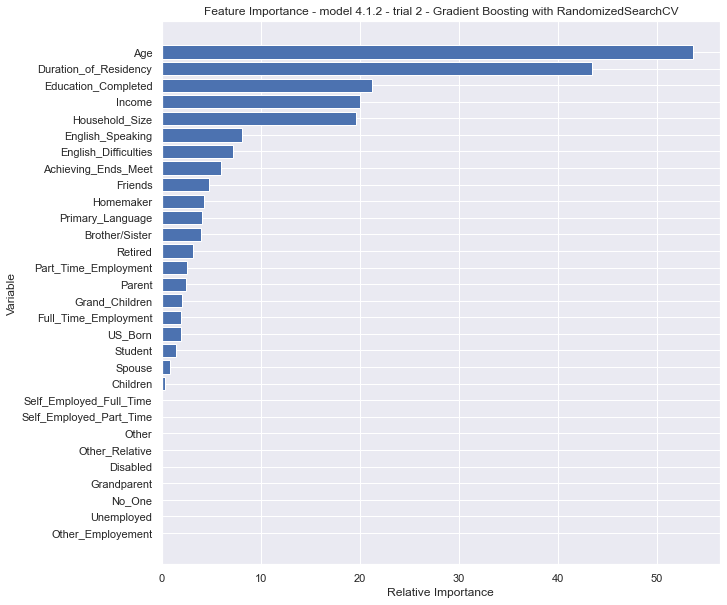

In [16]:
feature_importance = test_gb.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())[:30]
sorted_idx = np.argsort(feature_importance)[:30]

pos = np.arange(sorted_idx.shape[0]) + .5
print(pos.size)
sorted_idx.size
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, x.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.ylabel('Variable')
plt.title('Feature Importance - model 4.1.2 - trial 2 - Gradient Boosting with RandomizedSearchCV')
f1 = plt.gcf()
plt.show()
f1.savefig('Feature Importance - model 4.1.2 - trial 2 - Gradient Boosting with RandomizedSearchCV.png')

In [17]:
import csv
model_name = 'Model 4.1.1 - Random Forest with RandomizedSearchCV'
values = [model_name,
          test_gb,
          np.sqrt(metrics.mean_squared_error(y_test,y_pred)),
          metrics.mean_absolute_error(y_test, y_pred), 
          wall_clock]
out = csv.writer(open("Model 4.1.1 Performance Metrics - trial 1.csv","w"), delimiter=',',quoting=csv.QUOTE_ALL)
out.writerow(values)

250